# Perceptron Lab





This is the scaffold code for the perceptron lab and each lab will have a similar scaffold. There are both code boxes and discussion boxes that you will need to fill in as part of the lab. For example, the first code box you will fill is found below in section one. It a PerceptronClassifier class with function stubs. In addition to filling out the stubs, you are encouraged to add additional functions, parameters, etc. as you see fit.  You do not need to use the scaffolding, but your learners must minimally support the functions and parameters defined in the scaffolding.

**You should have some discussion for all subtasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking. Label all axes on graphs. The report for each subtask might go something like:
In this task I divided the randomly shuffled training set into a training set (70%) and a test set (30%). I tried different values of parameter x from n-m and reported training and test set accuracy in the table.  I kept testing until m because… The accuracy on the training set was highest for values between 2-4 while for the test set the accuracy was highest for values 5 and 6. In most casees just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

In [ ]:
# imports
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

## 1. Correctly implement and submit your own code for the perceptron learning algorithm. 

### Code requirements
- Shuffle the data each epoch. Write your own this time. In the future you can use the scikit-learn version if you want.
- Implement a way to create a random train/test split. Write your own this time. In the future you can use the scikit-learn version if you want. 
- Your node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners, but don't call any of the super methods to accomplish the requirements above.
- You may use other packages for ARFF loading, graphing, generating a random number, etc.

In [ ]:
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None, epochs=10):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.length =  X.shape[1] + 1
        self.weights = self.initialize_weights() if not initial_weights else initial_weights
        self.weights = np.array(self.weights)
        self.misclass = []
        X_og = X.copy()
        y_og = y.copy()
        x_len = X.shape[1] + 1
        X = np.column_stack((X, np.ones(X.shape[0])))
        
        for j in range(epochs):
            passed = True
            if self.shuffle:
                curr_X, curr_y = self._shuffle_data(X, y)
            else:
                curr_X, curr_y = X, y
            self.misclass.append(1-self.score(X_og, y_og))
            for i in range(len(X)):
                if sum((curr_X[i]*self.weights)) > 0 and curr_y[i] == 0.0:
                    delta_weight = self.lr*(curr_y[i] - 1)*curr_X[i]
                    passed = False
                elif sum((curr_X[i]*self.weights)) <= 0 and curr_y[i] == 1.0:
                    delta_weight = self.lr*(curr_y[i] - 0)*curr_X[i]
                    passed = False
                else:
                    delta_weight = np.zeros(x_len)
                self.weights += delta_weight
            if passed:
                self.epochs = j
                break
            else: 
                self.epochs = epochs
        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        X = np.column_stack((X, np.ones(X.shape[0])))
        nets = [sum((X[i]*self.weights)) for i in range(len(X))]
        return [1 if x > 0 else 0 for x in nets]

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return np.random.uniform(0,1,self.length)

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return np.mean(y==self.predict(X))

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        z = np.column_stack([X, y])
        np.random.shuffle(z)
        return z[:,:-1], z[:,-1]

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights

## 1.1 Debug and Evaluation

Use your perceptron code first to solve the Debug data. We provide you with several parameters, and you should be able to replicate our results every time. When you are confident your code is correct, run your perceptron on the Evaluation data with the same parameters.

Debug and Evaluate your model using the parameters below

Learning Rate = 0.1 \ 
Deterministic = 10 [This means run it 10 epochs and should be the same everytime you run it] \ 
Shuffle = False \ 
Initial Weights = All zeros

---

### 1.1.1 (20%) Debug

Debug your model by running it on the [debug dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff)

Expected Results:

Accuracy = [0.88]\
Final Weights = [-0.23  0.18 -0.1 ]

In [ ]:
from scipy.io import arff
import pandas as pd

dataset = arff.loadarff("linsep2nonorigin.arff")
data = pd.DataFrame(dataset[0], dtype=float)
X = data.drop(columns=['class']).to_numpy()
y = data['class'].to_numpy()

perp = PerceptronClassifier(0.1, shuffle=False)
perp.fit(X, y, [0., 0., 0.])
print(perp.weights)
print(perp.score(X, y))

[-0.23  0.18 -0.1 ]
0.875


After running my perceptron class on the debug data It was pretty much on the nose with the final weights. however, the accuracy of the run was different by .05. I am unsure if that is a substantial number to consider, however, the accuracy is accurate by + or - .1

### 1.1.2 (20%) Evaluation

We will evaluate your model based on it's performance on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff). Use the same parameters as the debug dataset

In [ ]:
dataset = arff.loadarff("data_banknote_authentication.arff")
data = pd.DataFrame(dataset[0], dtype=float)
X = data.drop(columns=['class']).to_numpy()
y = data['class'].to_numpy()

perp = PerceptronClassifier(0.1, shuffle=False)
perp.fit(X, y)
print(perp.weights)
print(perp.score(X, y))

[-4.0683086  -2.74045275 -3.04119752 -1.4512887   5.26721053]
0.978134110787172


I ran the same Perceptron class on the data_banknote_authentication data and it seemed to run fairly well with an accuracy of 97%.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs (ranging between -1 and 1) with 4 instances from each class. 
- One data set should be linearly separable and the other not.



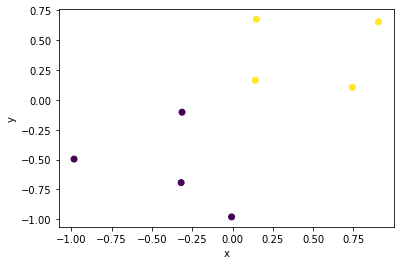

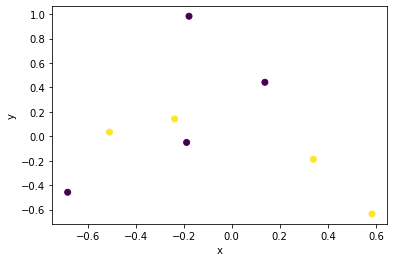

In [ ]:
X_1 = np.vstack([np.random.uniform(-1, 0, (4,2)), np.random.uniform(0, 1, (4,2))])
y_1 = np.hstack([np.zeros(4), np.ones(4)])
plt.scatter(*X_1.T, c=y_1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

X_2 = np.vstack([np.random.uniform(-1, 1, (4,2)), np.random.uniform(-1, 1, (4,2))])
y_2 = np.hstack([np.zeros(4), np.ones(4)])
plt.scatter(*X_2.T, c=y_2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

I created 2 datasets one is linearly seperable while the other one is not. I did this by using a random plot of points, however, I made sure that one color of points correlated to be >0 and the other to be < 0. That way we know that there are two different outputs given. With the second one, I just did it on the whole graph and which made it non linearly seperable. 

### 2.2 (5%) Train on both sets with your perceptron code (with LR=.1)

In [ ]:
perp = PerceptronClassifier(0.5, shuffle=False)
perp.fit(X_1, y_1)
print(perp.weights)
print(perp.epochs)

perp1 = PerceptronClassifier(0.2, shuffle=False)
perp1.fit(X_2, y_2)
print(perp1.weights)
print(perp1.epochs)

[ 0.62581735  0.56436282 -0.08281947]
1
[-0.16646628 -0.13353027  0.03951216]
10


I then trained on both datasets by running it through my perceptron code and the output on the table above.

### 2.3 (5%) Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
 - For all graphs always label the axes!
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

<Figure size 432x288 with 0 Axes>

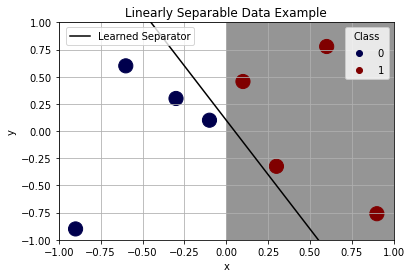

In [ ]:
# Sample Graph code
# --- Dataset 2: if input 1 >=0 1 else 0
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a grid
plt.figure(1)
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
X, Y = np.meshgrid(xlist, ylist) # make coordinate matrix for our x and y lines
Z = X # optional, I wanted to show the true class distinction

# Create a plot
fig,ax=plt.subplots(1,1)
ax.contourf(X, Y, Z, levels=[0, 1], cmap = 'Greys') # optional, I wanted to show the true class distinction
ax.set_title('Linearly Separable Data Example')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)

# Scatter plot data points 
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = ax.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend
ax.add_artist(legend)

# Plot the leanrned separator
w = [1,1,1] # Get the weights from your own perceptron
slope = -2 # this is a magic Number; You should have an equation that calculates the true slope using your perceptron weights
intercept = 0.1 # this is a magic Number; You should have an equation that calculates the true intercept using your perceptron weights
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.legend(['Learned Separator'], bbox_to_anchor=(.42, 1.0), loc = "upper right") # Legend

plt.grid() # add grid lines
plt.show() # show the plot

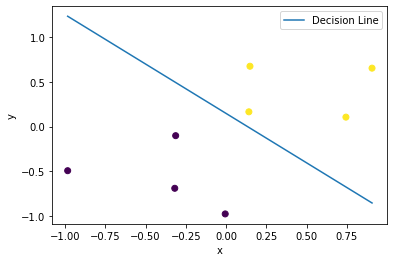

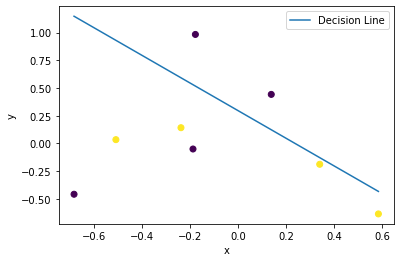

In [ ]:
y_sep1 = lambda x: (-(perp.get_weights()[2] / perp.get_weights()[1]) / (perp.get_weights()[2] / perp.get_weights()[0]))*x + (-perp.get_weights()[2] / perp.get_weights()[1])
plt.scatter(*X_1.T, c=y_1)
plt.plot(np.array(sorted(X_1[:, 0], reverse=True)), y_sep1(np.array(sorted(X_1[:, 0], reverse=True))), label='Decision Line')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

y_sep1 = lambda x: (-(perp1.get_weights()[2] / perp1.get_weights()[1]) / (perp1.get_weights()[2] / perp1.get_weights()[0]))*x + (-perp1.get_weights()[2] / perp1.get_weights()[1])
plt.scatter(*X_2.T, c=y_1)
plt.plot(np.array(sorted(X_2[:, 0], reverse=True)), y_sep1(np.array(sorted(X_2[:, 0], reverse=True))), label='Decision Line')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

I ran through and plotted each dataset, and the decision line seemed to correspond to the each graph. Of course, the linearly seperable data's decision line was correct in seperating the two and was able to get 100% accuracy on the data. However, the non-linearly seperable data was not as accurate. It still made a reasonable approximation, but not as well as it did for the linearly seperable data. 

### 2.4 (5%) Discuss why the perceptron won’t converge on non-linearly separable data.

Preceptron wont converge on non-linearly separable data because perceptron finds seperating hyperplanes with the equation of a line and can only learn hyperplanes.Also, the summantion of infinitely many linear answers will always be linear. Therefore, perceptron can only work with separable data that is linear. 

## 3. Use your perceptron code to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff).

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 3.1 (10%) Create a table that reports the final training and test set accuracy and the number of epochs for each trial.

- Try it five times with different random 70/30 splits. 
- Use your own code to randomize and make splits. 
- Report the 5 trials and the average across the 5 trials in a table (below is an example of what a smaller table might look like).  

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .95 | .55 | 4 |
| 2 | .85 | .45 | 6 |
| Average | .9 | .5 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [ ]:
dataset = arff.loadarff("voting-dataset.arff")
data = pd.DataFrame(dataset[0], dtype=str)
X = data.drop(columns=['Class']).to_numpy()
y = data['Class'].to_numpy()

X = np.array([[1 if X[i][j]=="b\'y\'" else 0 for j in range(len(X[0]))] for i in range(len(X))])
y = np.array([1 if y[i] == "b'republican'" else 0 for i in range(len(y))])
cut_point = int(len(X) * 0.7)
data = {'Trial':[], 'Training Accuracy':[], 'Test Accuracy':[], 'Number of Epochs':[]}
misclass = []

def shuffler(X, y):
    z = np.column_stack([X, y])
    np.random.shuffle(z)
    return z[:,:-1], z[:,-1]

for i in range(5):
    data['Trial'].append(i)
    X_1, y_1 = shuffler(X, y)
    X_1_tr = X_1[:cut_point]
    X_1_test = X_1[cut_point:]
    y_1_tr = y_1[:cut_point]
    y_1_test = y_1[cut_point:]

    percep1 = PerceptronClassifier(.1, True)
    percep1.fit(X_1_tr, y_1_tr, None)
    data['Training Accuracy'].append(percep1.score(X_1_tr,y_1_tr))
    data['Test Accuracy'].append(percep1.score(X_1_test,y_1_test))
    data['Number of Epochs'].append(percep1.epochs)
    misclass.append(percep1.misclass)

df = pd.DataFrame(data)
print(df)

   Trial  Training Accuracy  Test Accuracy  Number of Epochs
0      0           0.972050       0.949640                10
1      1           0.947205       0.899281                10
2      2           0.962733       0.971223                10
3      3           0.934783       0.935252                10
4      4           0.972050       0.913669                10


*Discussion*

### 3.2 (5%) By looking at the weights, do your best to explain what the model has learned and how the individual input features affect the result. Which specific features are most critical for the voting task, and which are least critical? 


The Model has learned that certain voting issues have a bigger partisan and are a huge indicator of which political party they are in. The most specific voiting task are:
- physician-fee-freeze
- aid-to-nicaraguan-contras
- synfuels-corporation-cutback
- crime
- export-administration-act-south-africa

The least critical are:
- handicapped-infants
- water-project-cost-sharing
- superfund-right-to-sue

### 3.3 (5%) Make a graph of the average misclassification rate vs epochs (0th – final epoch).

- Average the misclassification rate for the training set across your 5 trials (not across 5 epochs): mean(number misclassified  /  number of total data points) vs epoch
- For larger number epochs, only include in the average those runs that trained for at least that length


![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

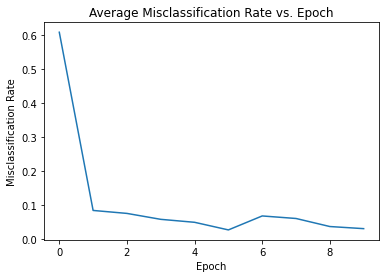

In [ ]:
# Graph here
    
def plot_misclassification(avg_misclassification_rate):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

avg_miss = np.mean(misclass, axis=0)
plot_misclassification(avg_miss)
    


According to the graph, it seems like the accuracy evens out and does not seem to imporve that much with the more epochs we run on it. In fact, it even seems to get a little bit worse once we hit 6 epochs. Then it starts to plataeu again.

## 4.1 (10%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn the voting task above.
- Report and compare your results with your own perceptron code.
- Try out some of the hyper-parameters that scikit-learn makes available for the perceptron and discuss your findings. Record your impressions of how scikit-learn works.

In [ ]:
dataset = arff.loadarff("voting-dataset.arff")
data = pd.DataFrame(dataset[0], dtype=str)
X = data.drop(columns=['Class']).to_numpy()
y = data['Class'].to_numpy()

X = np.array([[1 if X[i][j]=="b\'y\'" else 0 for j in range(len(X[0]))] for i in range(len(X))])
y = np.array([1 if y[i] == "b'republican'" else 0 for i in range(len(y))])
cut_point = int(len(X) * 0.7)
data = {'Trial':[], 'Training Accuracy':[], 'Test Accuracy':[]}
misclass = []

def shuffler(X, y):
    z = np.column_stack([X, y])
    np.random.shuffle(z)
    return z[:,:-1], z[:,-1]

for i in range(5):
    data['Trial'].append(i)
    X_1, y_1 = shuffler(X, y)
    X_1_tr = X_1[:cut_point]
    X_1_test = X_1[cut_point:]
    y_1_tr = y_1[:cut_point]
    y_1_test = y_1[cut_point:]

    percep1 = Perceptron()
    percep1.fit(X_1_tr, y_1_tr)
    data['Training Accuracy'].append(percep1.score(X_1_tr,y_1_tr))
    data['Test Accuracy'].append(percep1.score(X_1_test,y_1_test))

df = pd.DataFrame(data)
print(df)

   Trial  Training Accuracy  Test Accuracy
0      0           0.968944       0.942446
1      1           0.909938       0.942446
2      2           0.953416       0.956835
3      3           0.944099       0.949640
4      4           0.962733       0.956835


For my comparison between the two in training accuracy between my perceptron algorithm and the scikit-learn perceptron algorithm was very little. It was to the hundreths of accuracy which could be a big difference in some cases, but in terms of these cases it might not matter as much

## 4.2 (10%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn one other data set of your choice.  
- The UC Irvine Data Repository is a great source, but you may get your data set from wherever you like, though it should represent a real world task.
- Try out some of the hyper-parameters that scikit-learn makes available.

In [ ]:
# Load sklearn perceptron

# Train on your dataset

*Discuss your findinga and hyperparameters used*

## 5. (Optional 5% extra credit) Use the perceptron rule to learn the [iris task](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) or some other task with more than two possible output values. 

Note that the [iris data](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) set has 3 output classes, and a perceptron node only has two possible outputs.  You could implement an approach to deal with this like we discussed in class (review in slides). For testing you just execute the novel instance on each model and report the results. You could break ties using net values but that is not required for this part.

In [ ]:
# Code here

*Discussion*